# Part 1: Handwriting recognition

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

In [5]:
tf.random.set_seed(42)

In [6]:
hand = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [8]:
(X_train, y_train), (X_test, y_test) = hand

In [9]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

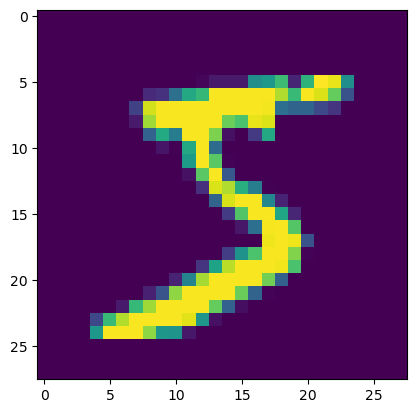

In [13]:
plt.imshow(X_train[0])

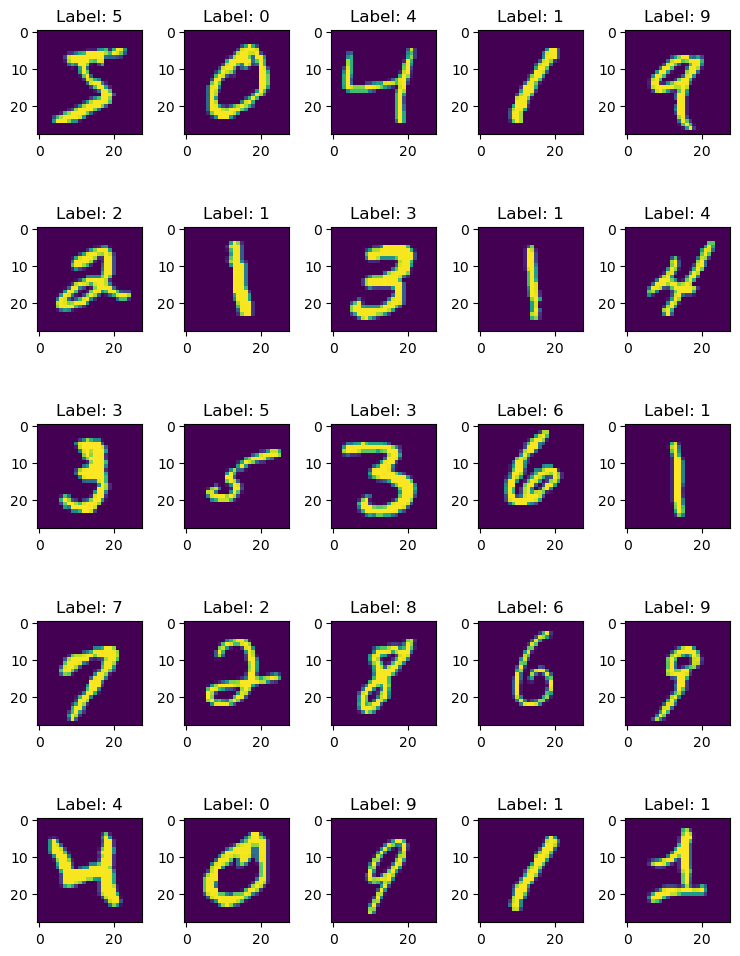

In [14]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [15]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [17]:
X_train /= 255
X_test /= 255

In [19]:
# 6. Preprocess class labels
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [20]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [21]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


In [22]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\casbacar\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# 9. Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.9372 - loss: 0.2075
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9743 - loss: 0.0853
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9790 - loss: 0.0663
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9833 - loss: 0.0544
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9855 - loss: 0.0473
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.9880 - loss: 0.0395
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9890 - loss: 0.0357
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9895 - loss: 0.0323
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9908 - loss: 0.0279
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9906 - loss: 0.0285


In [24]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 2s - 7ms/step - accuracy: 0.9907 - loss: 0.0348


In [25]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


array([1., 1., 1., 1.], dtype=float32)

In [26]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [27]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[[ 974    0    2    0    0    0    2    1    1    0]
 [   0 1128    2    0    0    2    1    2    0    0]
 [   1    0 1026    0    0    0    0    5    0    0]
 [   0    0    1 1004    0    4    0    0    1    0]
 [   0    0    2    0  973    0    1    0    3    3]
 [   1    0    0    2    0  887    1    0    1    0]
 [   3    1    0    0    1    5  947    0    1    0]
 [   0    0    4    1    0    0    0 1021    1    1]
 [   4    1    2    1    1    1    1    1  961    1]
 [   0    0    0    3    3    9    0    1    7  986]]


## Testing with external data

In [142]:
# Identifying number 0
img = Image.open(r'C:\Users\casbacar\Downloads\inv2.jpg').convert('L')  # Convert to grayscale
newsize = (28,28)
img = img.resize(newsize)
testimg = asarray(img2)
testimg = testimg.reshape(1, 28, 28, 1)
testimg  = testimg / 255.0

In [116]:
img

In [117]:
# predict the number
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
0


In [129]:
# Number 8
img4 = Image.open(r'C:\Users\casbacar\Pictures\eight.PNG').convert('L')
newsize = (28,28)
img4 = img4.resize(newsize)  # Error: using img instead of img4
testimg4 = asarray(img4)
testimg4 = testimg4.reshape(1, 28, 28, 1)
testimg4 = testimg4 / 255.0

In [130]:
img4

In [131]:
# predicting the number
predict_value4 = model.predict(testimg4)
digit4 = argmax(predict_value4)
print(digit4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
3


In [138]:
# Identifying number 3
img3 = Image.open(r'C:\Users\casbacar\Pictures\Picture4.png').convert('L')  # Convert to grayscale
newsize = (28,28)
img3 = img3.resize(newsize)
testimg3 = asarray(img3)
testimg3 = testimg3.reshape(1, 28, 28, 1)
testimg3 = testimg3 / 255.0

In [139]:
img3

In [141]:
# predict the number
predict_value = model.predict(testimg3)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
3


# Part 2: Facial recognition

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [159]:
#download the weather images and put them in a directory
path = r'C:\Users\casbacar\Documents\Study\Specialization\Unsupervised\Radar_images\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [160]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [161]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [163]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 11, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/11
28/28 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8504 - loss: 0.0608 - val_accuracy: 0.8125 - val_loss: 0.0646
Epoch 2/11
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.8125 - loss: 0.0869 - val_accuracy: 0.7812 - val_loss: 0.0829
Epoch 3/11
28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8872 - loss: 0.0453 - val_accuracy: 0.8393 - val_loss: 0.0642
Epoch 4/11
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.9375 - loss: 0.0227 - val_accuracy: 0.8214 - val_loss: 0.0662
Epoch 5/11
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8838 - loss: 0.0447 - val_accuracy: 0.7768 - val_loss: 0.0760
Epoch 6/11
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.6562 - loss: 0.1135 - val_accuracy: 0.8214 - val_loss: 0.0688
Epoch 7/11
28/28 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8377 - loss: 0.0592 - val_accuracy: 0.8170 - val_loss: 0.0671
Epoch 8/11
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - accuracy: 0.9375 - loss: 0.0298 - val_accuracy: 0.8304 - v

In [164]:
results = pd.DataFrame(model.history.history)

In [165]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

In [166]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [167]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.8883774280548096, Val_Accuracy: 0.8080357313156128
Loss: 0.042673032730817795, Val_Loss: 0.07863207161426544


31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 270ms/step


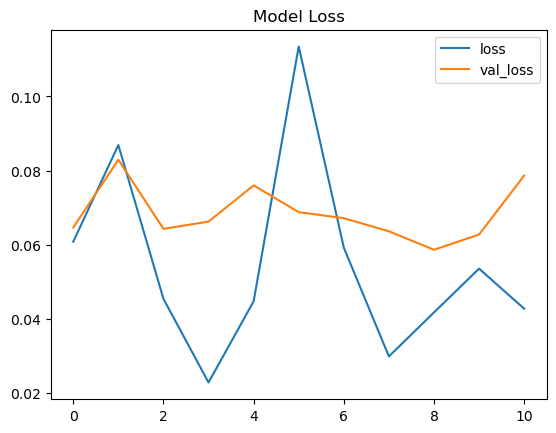

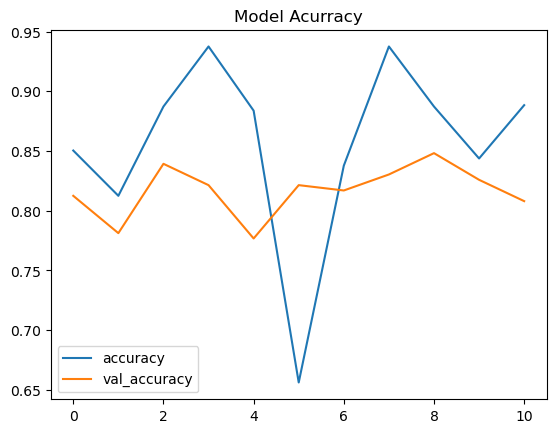

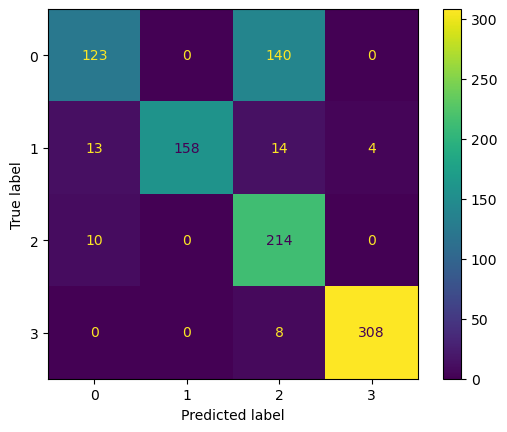

In [168]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 30 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [172]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.show(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


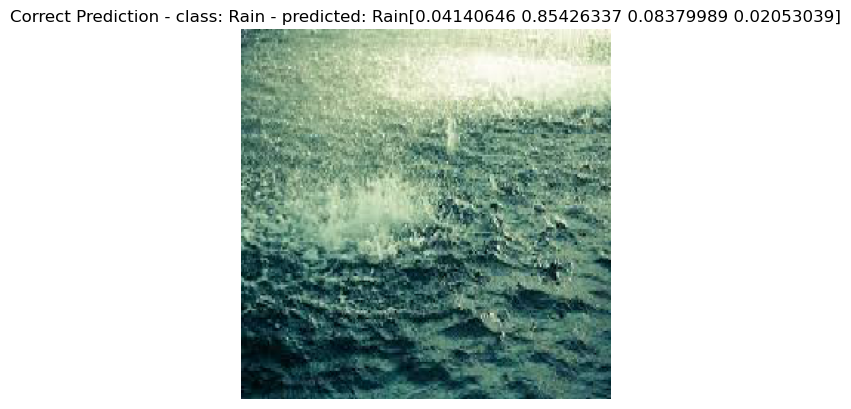

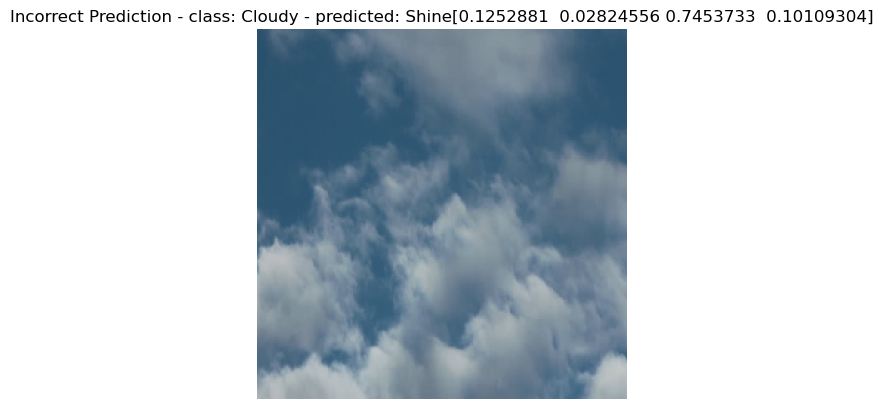

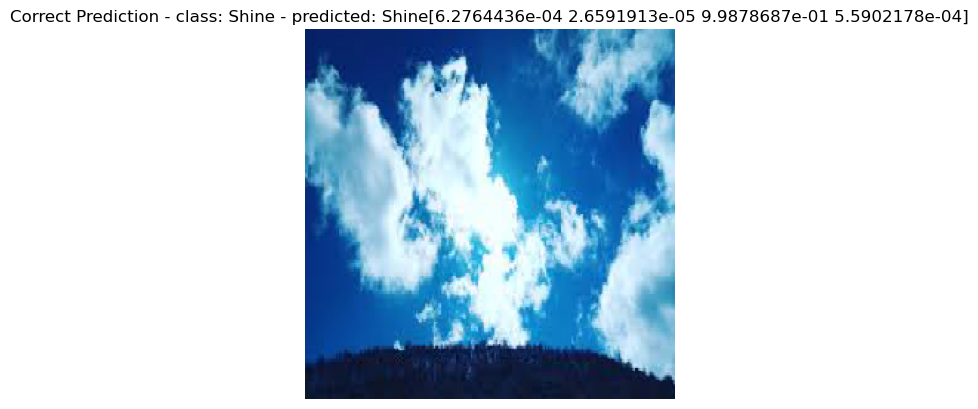

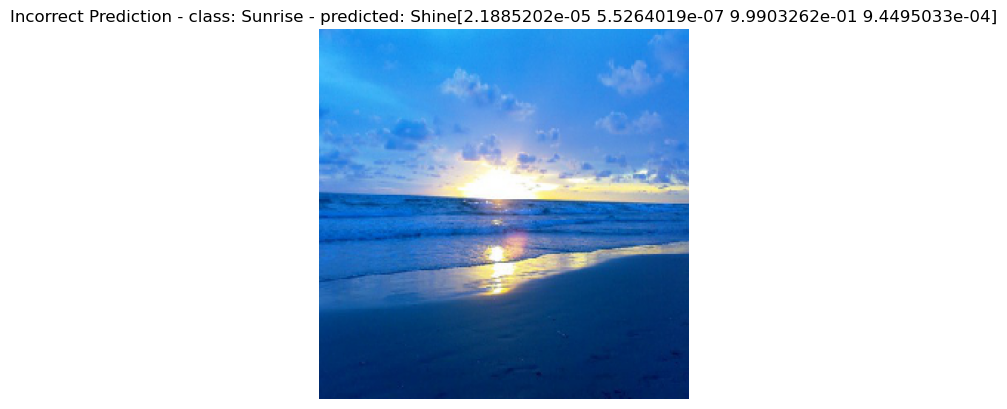

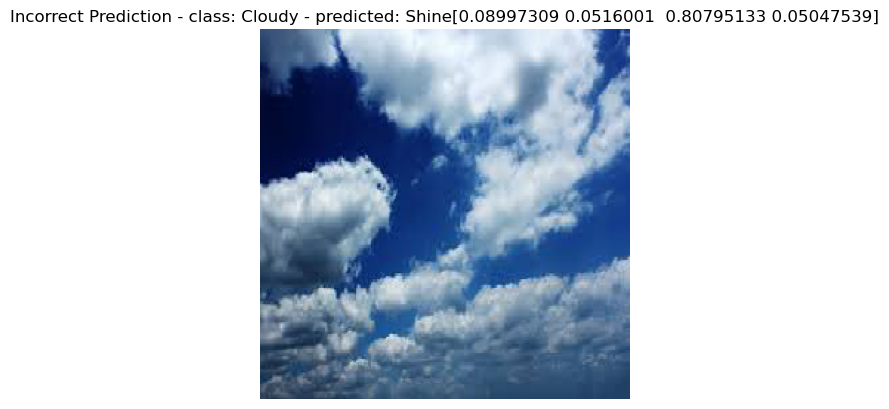

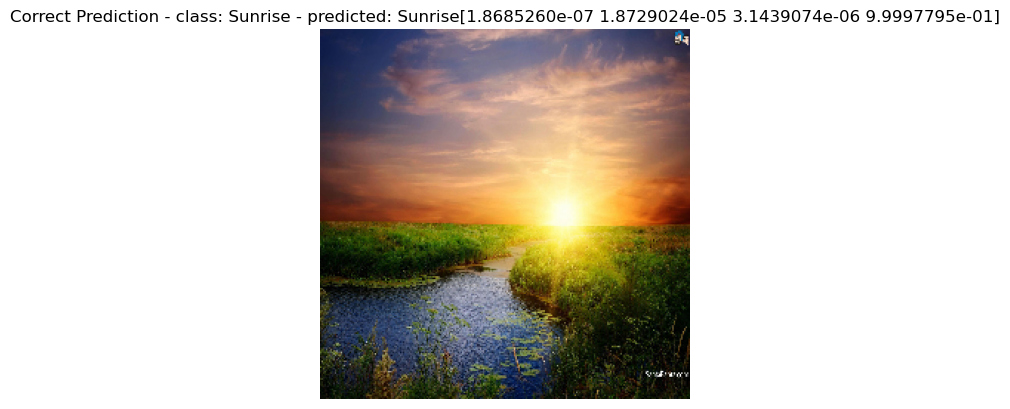

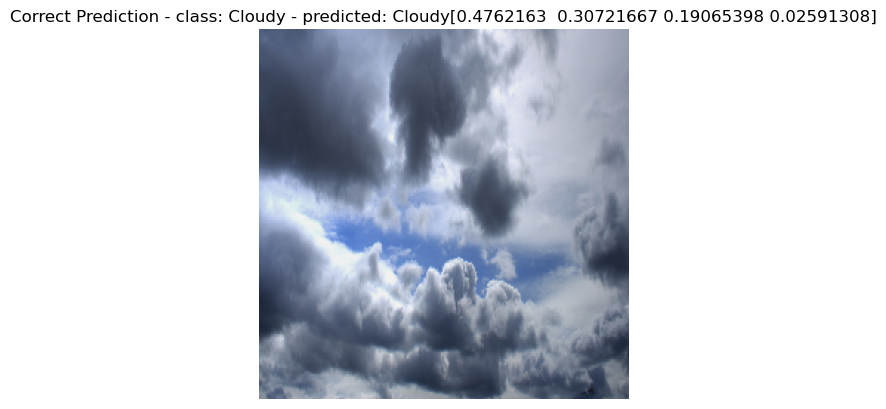

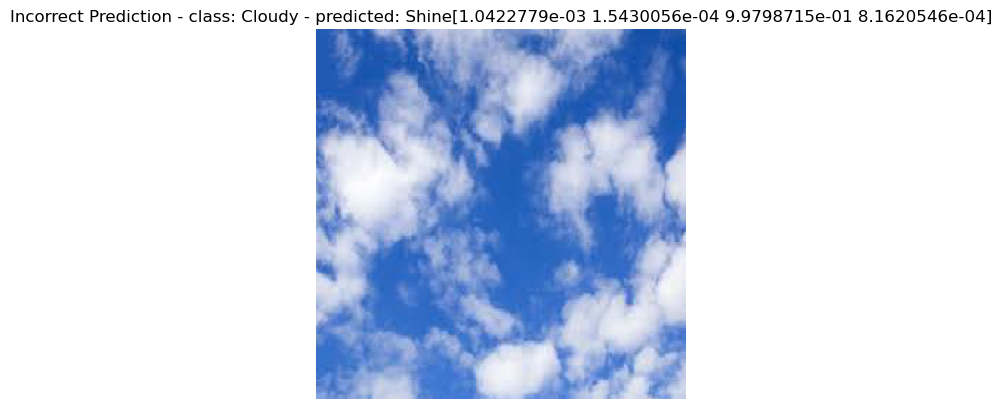

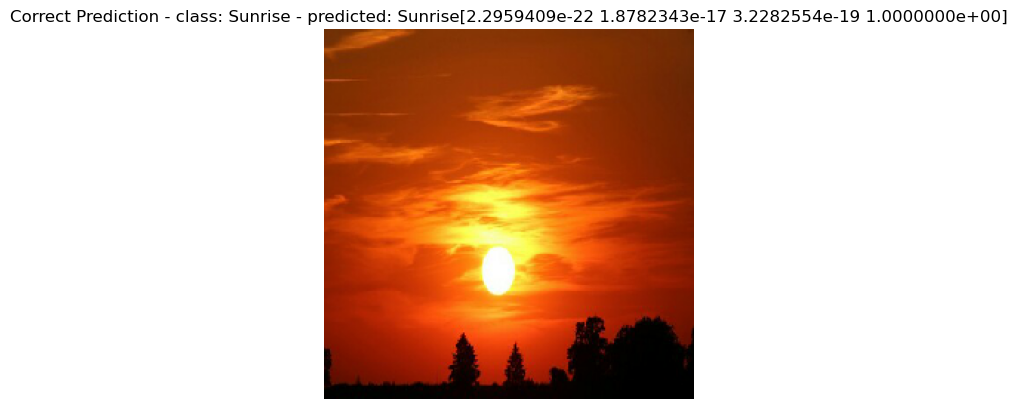

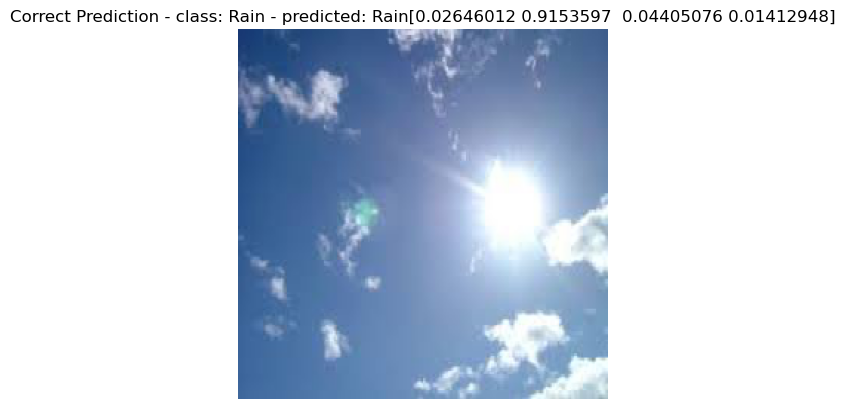

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [173]:
predict_one(model,1) #<--you can show multiple pictures with this command. Just fill in the number you want to see.